# 정규선형모델

## 연속형 독립변수가 하나인 모델(단순회귀)

### 분석 준비

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3

%matplotlib inline

### 데이터 읽어 들이기와 표시

In [2]:
beer = pd.read_csv("dataset/5-1-1-beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


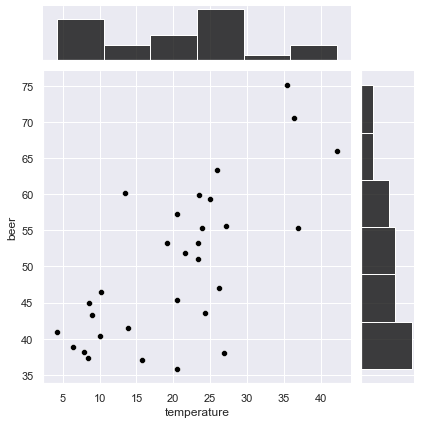

In [3]:
sns.jointplot(x = "temperature", y = "beer", data = beer, color = "black")

### 모델 구축

In [4]:
from IPython.display import Image

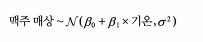

In [5]:
Image('img/Model_Create.jpg')

### statsmodels를 이용한 모델링

#### 종속변수 : beer // 독립변수 : temperature

In [6]:
lm_model = smf.ols(formula = "beer ~ temperature", data = beer).fit()

### 추정 결과 표시와 계수 검정

In [7]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           1.11e-05
Time:                        17:25:18   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### summary 함수의 출력 내용 설명

Dep.Variable : 종속변수의 이름, Dep은 Depended의 약자로, 종속변수라는 의미입니다.
Model, Method : 범용최소제곱법을 사용했다는 설명
Date, Time : 모델을 추정한 일시
No, Observations : 샘플사이즈
Df Residuals : 샘플사이즈에서 추정된 파라미터 수를 뺀 것
Df Model : 사용된 독립변수의 수
Covariance Type : 공분산 타입, 특별히 지정하지 않으면 nonrobust가 됨
R-squared, Adj.R-squared : 결정계수와 자유도 조정이 끝난 결정 계수, 결정계수는 이후에 설명
F-statistic, Prob(F-statistic) : 분산분석 결과, 분산분석은 이후 설명
Log-Likelihood : 최대로그우도
AIC : 아카이케 정보 기준
BIC : 베이즈 정보 기준

### AIC를 이용한 모델 선택

In [8]:
null_model = smf.ols("beer ~ 1", data = beer).fit()
null_model.aic

227.94194972563105

In [9]:
lm_model.aic

208.9090293557544

In [10]:
lm_model.llf # 로그 우도

-102.4545146778772

In [11]:
lm_model.df_model # 독립변수의 수

1.000

In [12]:
-2*(lm_model.llf - (lm_model.df_model+1)) # AIC 구하기

208.9090293557544

### seaborn을 이용한 회귀직선 그래프 그리기

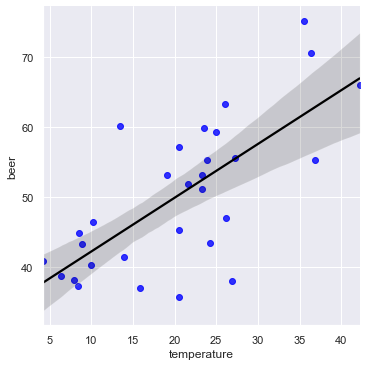

In [13]:
sns.lmplot(x = "temperature", y = "beer", data = beer, 
           scatter_kws = {"color":"blue"},
          line_kws = {"color":"black"})

### 모델을 이용한 예측

In [14]:
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [15]:
lm_model.predict(pd.DataFrame({"temperature":[0]}))

0    34.610215
dtype: float64

In [16]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [17]:
lm_model.predict(pd.DataFrame({"temperature":[20]}))

0    49.918767
dtype: float64

In [18]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20

beta0 + beta1 * temperature

49.918767010950496

### 잔차 계산

In [19]:
resid = lm_model.resid
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [20]:
y_hat = beta0+beta1*beer.temperature
y_hat.head(3)

0    50.301481
1    53.745905
2    42.264491
Name: temperature, dtype: float64

In [21]:
(beer.beer - y_hat).head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

### 결정계수

In [22]:
mu = np.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

np.sum((yhat - mu)**2)/np.sum((y-mu)**2)

0.5039593230611851

In [23]:
lm_model.rsquared

0.5039593230611857

In [24]:
np.sum((yhat-mu)**2)+sum(resid**2)

3277.1146666666646

In [25]:
np.sum((y-mu)**2)

3277.1146666666664

In [26]:
1-np.sum(resid**2)/np.sum((y-mu)**2)

0.5039593230611857

### 수정된 결정계수

In [27]:
n = len(beer.beer)
s = 1
1-((np.sum(resid**2) / (n-s-1))/(np.sum((y-mu)**2) / (n-1)))

0.48624358459908523

In [28]:
lm_model.rsquared_adj

0.48624358459908523

### 잔차 그래프

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

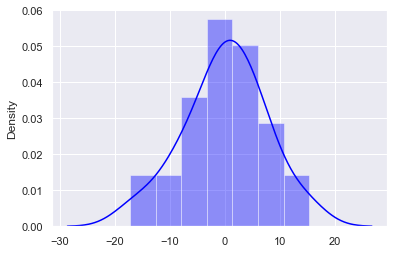

In [29]:
sns.distplot(resid, color='blue')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


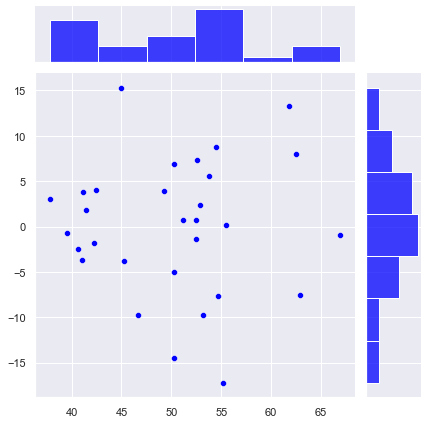

In [30]:
sns.jointplot(lm_model.fittedvalues, resid, joint_kws = {"color":"blue"},
             marginal_kws={"color":"blue"})

### Q-Q플롯

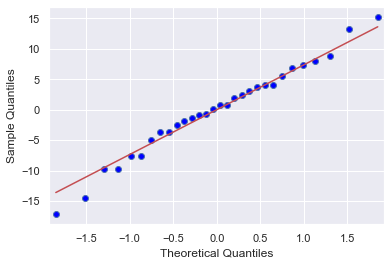

In [31]:
fig = sm.qqplot(resid, line = "s")

In [32]:
resid_sort = resid.sort_values()
resid_sort.head()

3    -17.200217
21   -14.501481
12    -9.710106
4     -9.703971
10    -7.664418
dtype: float64

In [33]:
1/31

0.032

In [34]:
nobs = len(resid_sort)
cdf = np.arange(1, nobs+1)/ (nobs+1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226, 0.258, 0.29 ,
       0.323, 0.355, 0.387, 0.419, 0.452, 0.484, 0.516, 0.548, 0.581,
       0.613, 0.645, 0.677, 0.71 , 0.742, 0.774, 0.806, 0.839, 0.871,
       0.903, 0.935, 0.968])

In [35]:
ppf = stats.norm.ppf(cdf)
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865, -0.753, -0.649,
       -0.552, -0.46 , -0.372, -0.287, -0.204, -0.122, -0.04 ,  0.04 ,
        0.122,  0.204,  0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])

### summary 함수의 출력으로 보는 잔차 체크

귀무가설 : 잔차가 정규분포를 따른다.

대립가설 : 잔차가 정규분포와 다르다.

왜도(Skew) : 히스토그램의 좌우비대칭 방향과 그 정도를 측정하는 지표
    왜도가 0보다 크면 오른쪽이 길어짐.
    정규분포의 왜도는 0
    
첨도(Kurtosis) : 히스토그램 중심부의 뾰족함을 측정하는 지표
    값이 클수록 히스토그램의 가운데 부분이 뾰족해짐
    정규분포의 첨도는 3

## 분산분석 (ANalysis Of VAriance : ANOVA)

### 분산분석이 필요한 시기

#### 분산분석은 평균값의 차이를 검정하는 방법

(t검정을 사용할 수 없을 경우)

### 검정의 다중성

#### 검정을 반복함으로써 유의미한 결과를 얻기 쉬워지는 문제

### 분산분석의 직감적 사고방식 : F비

귀무가설 : 수준 간의 평균값에 차이가 없다.
    
대립가설 : 수준 간의 평균값에 차이가 있다.

#### F비 = (효과의 분산 크기) / (오차의 분산 크기)

### 유의미한 차이가 있을 때와 없을 때의 바이올린플롯

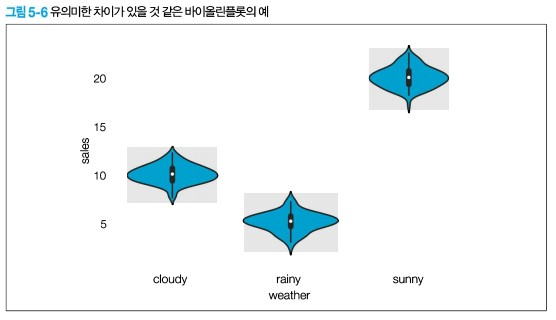

In [36]:
Image('img/Positive_ViolinPlot.jpg')

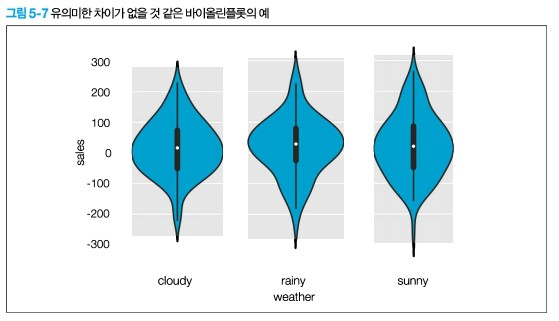

In [37]:
Image('img/Negative_ViolinPlot.jpg')

### 분산분석의 직감적 사고방식 : 오차 및 효과의 분리

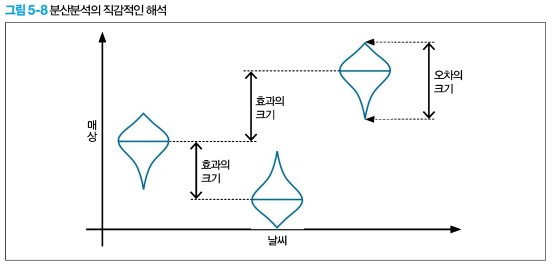

In [38]:
Image('img/ANOVA_Graph_translate.jpg')

### 군간변도오가 군내변동

군간변동 : 바이올린 간의 거리, 효과의 크기
    
군내변동 : 각 바이올린의 폭, 즉 오차의 크기

### 분석 준비

In [39]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3

%matplotlib inline

### 데이터 작성과 표시

In [40]:
weather = [
    'cloudy','cloudy',
    'rainy','rainy',
    'sunny','sunny'
]
beer = [6,8,2,4,10,12]

weather_beer = pd.DataFrame({
    "beer" : beer,
    "weather":weather
})
print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


<AxesSubplot:xlabel='weather', ylabel='beer'>

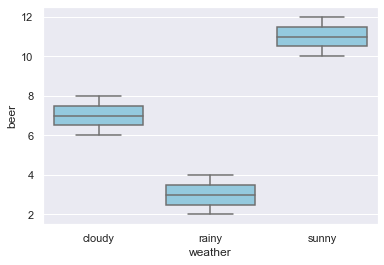

In [41]:
sns.boxplot(x = "weather", y = "beer", data = weather_beer, color = 'skyblue')

In [42]:
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy      7
rainy       3
sunny      11


### 분산분석(1) : 군간 제곱과 군내 제곱 계산

In [43]:
effect = [7,7,3,3,11,11]

In [44]:
mu_effect = np.mean(effect)
squares_model = np.sum((effect - mu_effect)**2)
squares_model

64.0

In [45]:
resid = weather_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [46]:
squares_resid = np.sum(resid**2)
squares_resid

6

### 분산분석(2) : 군간 분산과 군내 분산 계산

In [47]:
df_model = 2
df_resid = 3

In [48]:
variance_model = squares_model / df_model
variance_model

32.0

In [49]:
variance_resid = squares_resid / df_resid
variance_resid

2.0

### 분산분석(3) : p값 계산

In [50]:
f_ratio = variance_model / variance_resid
f_ratio

16.0

In [51]:
1-sp.stats.f.cdf(x = f_ratio, dfn = df_model, dfd = df_resid)

0.02509457330439091

### statsmodels를 이용한 분산분석

In [52]:
anova_model = smf.ols("beer ~ weather", data = weather_beer).fit()

In [53]:
print(sm.stats.anova_lm(anova_model, typ = 2))

          sum_sq   df     F    PR(>F)
weather     64.0  2.0  16.0  0.025095
Residual     6.0  3.0   NaN       NaN


### 모델의 계수 해석

In [54]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

### 모델을 사용해서 오차와 효과 분리하기

In [55]:
fitted = anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [56]:
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

In [57]:
beer = pd.read_csv("dataset/5-1-1-beer.csv")

lm_model = smf.ols(formula = "beer ~ temperature", 
                   data = beer).fit()

In [58]:
df_lm_model = 1
df_lm_resid = 28

In [59]:
lm_effect = lm_model.fittedvalues
# 모델을 적용한 값
lm_resid = lm_model.resid
# 잔차
mu = np.mean(lm_effect)
squares_lm_model = np.sum((lm_effect - mu) ** 2)
variance_lm_model = squares_lm_model / df_lm_model
# 잔차의 크기
squares_lm_resid = np.sum((lm_resid) ** 2)
variance_lm_resid = squares_lm_resid / df_lm_resid
# F비
f_value_lm = variance_lm_model / variance_lm_resid
f_value_lm

28.44698368850451

In [60]:
1 - sp.stats.f.cdf(
    x=f_value_lm,dfn=df_lm_model,dfd=df_lm_resid)

1.1148907825053733e-05

In [61]:
print(sm.stats.anova_lm(lm_model, typ=2))

                  sum_sq    df          F    PR(>F)
temperature  1651.532489   1.0  28.446984  0.000011
Residual     1625.582178  28.0        NaN       NaN


In [62]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           1.11e-05
Time:                        17:25:21   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 독립변수가 여럿인 모델

### 분석 준비

In [63]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3

%matplotlib inline

In [64]:
sales = pd.read_csv("dataset/5-3-1-lm-model.csv")
print(sales.head(3))

   humidity  price  sales  temperature weather
0      29.5    290  229.7         17.8   rainy
1      38.1    290  206.1         26.1   rainy
2      31.5    290  202.5         22.0   rainy


### 데이터로 그래프 그리기

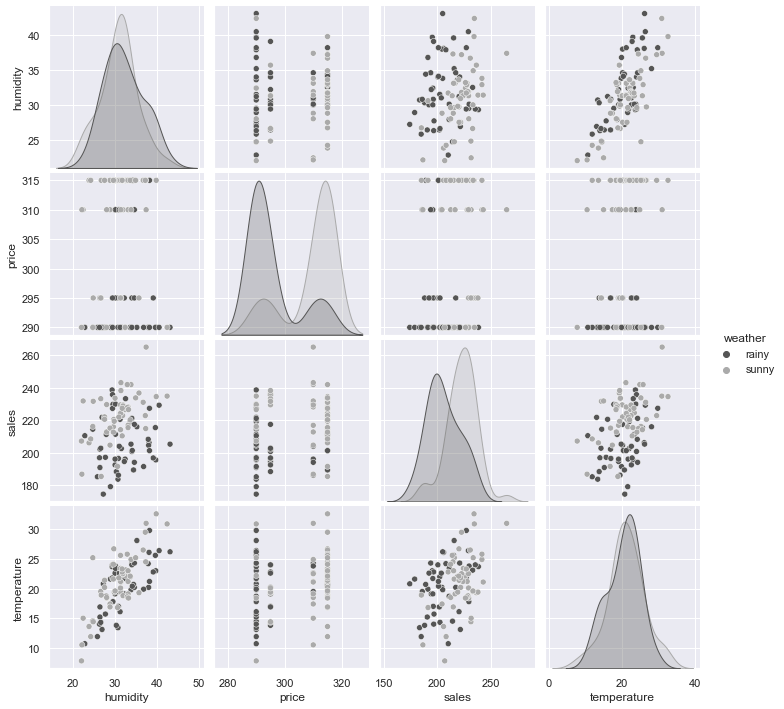

In [65]:
sns.pairplot(data = sales, hue = 'weather', palette = 'gray')

### 나쁜 분석 예 : 변수가 1개인 모델 만들기

In [66]:
lm_dame = smf.ols("sales ~ price", sales).fit()
lm_dame.params

Intercept    113.645406
price          0.332812
dtype: float64

In [67]:
print(sm.stats.anova_lm(lm_dame, typ = 2))

                sum_sq    df         F    PR(>F)
price      1398.392322   1.0  4.970685  0.028064
Residual  27570.133578  98.0       NaN       NaN


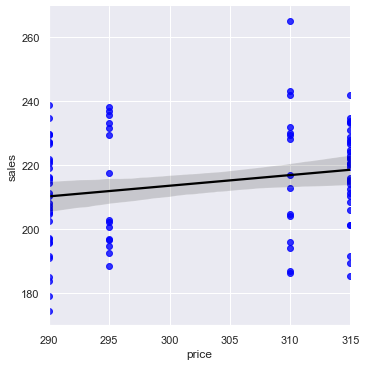

In [68]:
sns.lmplot(x = 'price',y = 'sales', data = sales,
          scatter_kws = {"color" : 'blue'},
          line_kws = {'color' : 'black'})

### 독립변수 간의 관계 조사하기

In [69]:
print(sales.groupby('weather').mean())

         humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102


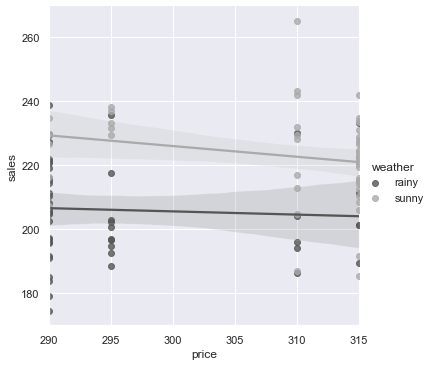

In [70]:
sns.lmplot(x = 'price', y = 'sales', data = sales,
          hue = 'weather',palette = 'gray')

### 복수의 독립변수를 가지는 모델

In [71]:
lm_sales = smf.ols(
'sales ~ weather + humidity + temperature + price', data = sales).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

### 나쁜 분석 예 : 일반적인 분산분석으로 검정하기

In [72]:
print(sm.stats.anova_lm(lm_sales, typ = 1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
humidity      1.0   1779.601  1779.601   9.805   0.002
temperature   1.0   2076.845  2076.845  11.443   0.001
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


In [73]:
lm_sales_2 = smf.ols(
'sales ~ weather + temperature + humidity + price', data = sales).fit()
print(sm.stats.anova_lm(lm_sales_2, typ = 1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
temperature   1.0   3814.779  3814.779  21.018   0.000
humidity      1.0     41.667    41.667   0.230   0.633
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


### 회귀계수의 t검정

In [74]:
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [75]:
lm_sales_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


### Type 2 ANOVA

#### 독립변수를 넣는 순서를 바꾸어도 검정결과가 변하지 않는 분산분석

### 모델 선택과 분산분석

In [76]:
mod_null = smf.ols('sales ~ 1', sales).fit()
resid_sq_null = np.sum(mod_null.resid**2)
resid_sq_null

28968.525899999993

In [77]:
mod_1 = smf.ols('sales ~ weather', sales).fit()
resid_sq_1 = np.sum(mod_1.resid**2)
resid_sq_1

21917.56499999999

In [78]:
resid_sq_null - resid_sq_1

7050.960900000002

In [79]:
print(sm.stats.anova_lm(mod_1).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  31.527     0.0
Residual  98.0  21917.565   223.649     NaN     NaN


In [80]:
mod_2 = smf.ols('sales ~ weather + humidity', sales).fit()
resid_sq_2 = np.sum(mod_2.resid**2)
resid_sq_2

20137.963897851758

In [81]:
resid_sq_1 - resid_sq_2

1779.6011021482336

In [82]:
print(sm.stats.anova_lm(mod_2).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  33.963   0.000
humidity   1.0   1779.601  1779.601   8.572   0.004
Residual  97.0  20137.964   207.608     NaN     NaN


In [83]:
mod_2_2 = smf.ols('sales ~ weather + temperature', sales).fit()
resid_sq_2_2 = np.sum(mod_2_2.resid **2)
resid_sq_2_2

18102.786426712217

In [84]:
mod_3_2 = smf.ols(
'sales ~ weather + temperature + humidity', sales).fit()
resid_sq_3_2 = np.sum(mod_3_2.resid**2)
resid_sq_3_2

18061.119361588426

In [85]:
resid_sq_2_2 - resid_sq_3_2

41.66706512379096

In [86]:
print(sm.stats.anova_lm(mod_3_2).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  37.478   0.000
temperature   1.0   3814.779  3814.779  20.277   0.000
humidity      1.0     41.667    41.667   0.221   0.639
Residual     96.0  18061.119   188.137     NaN     NaN


### Type 2 ANOVA와 수정제곱합

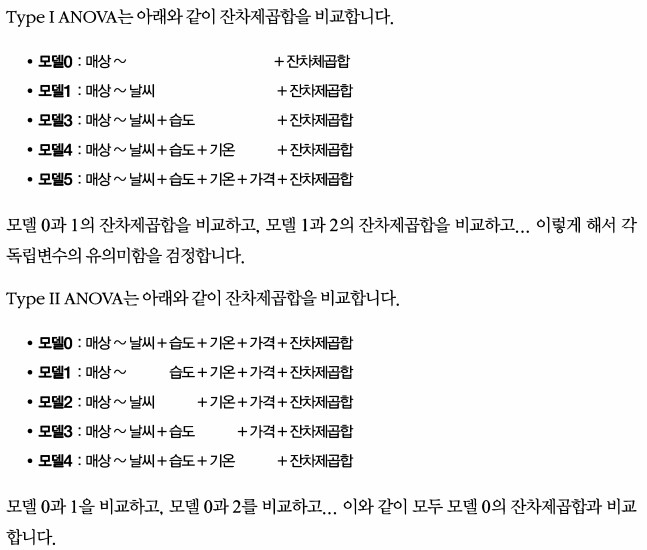

In [87]:
Image('img/ANOVA_Type1,2.jpg')

#### 수정제곱합 : Type 2 ANOVA에서 독립변수가 줄어들며 증가하는 잔차제곱합의 크기에 기반하여 독립변수가 갖는 효과의 크기를 정량화하는데 이 과정에서 계산된 군간 편차 제곱합

### Type 2 ANOVA(실습)

In [88]:
mod_full = smf.ols(
'sales ~ weather + humidity + temperature + price', sales).fit()
resid_sq_full = np.sum(mod_full.resid**2)
resid_sq_full

17242.71694236649

In [89]:
mod_non_humi = smf.ols(
'sales ~ weather + temperature + price', sales).fit()
resid_sq_non_humi = np.sum(mod_non_humi.resid**2)
resid_sq_non_humi

17299.142016107657

In [90]:
resid_sq_non_humi - resid_sq_full

56.42507374116758

In [91]:
print(sm.stats.anova_lm(mod_full, typ = 2).round(3))

                sum_sq    df       F  PR(>F)
weather       5845.878   1.0  32.208   0.000
humidity        56.425   1.0   0.311   0.578
temperature   2378.017   1.0  13.102   0.000
price          818.402   1.0   4.509   0.036
Residual     17242.717  95.0     NaN     NaN


In [92]:
mod_full.compare_f_test(mod_non_humi) # F비, p-value, 자유도 차

(0.310878037569596, 0.578453342712099, 1.0)

### 변수 선택과 모델 해석

In [93]:
print(sm.stats.anova_lm(mod_non_humi, typ = 2).round(3))

                sum_sq    df       F  PR(>F)
weather       6354.966   1.0  35.266   0.000
temperature   4254.736   1.0  23.611   0.000
price          803.644   1.0   4.460   0.037
Residual     17299.142  96.0     NaN     NaN


In [94]:
mod_non_humi.params

Intercept           273.301800
weather[T.sunny]     20.393871
temperature           1.417860
price                -0.326001
dtype: float64

### AIC를 이용한 변수 선택

In [95]:
print('모든 변수를 포함한 모델 : ',mod_full.aic.round(3))
print('습도를 제외한 모델 : ',mod_non_humi.aic.round(3))

모든 변수를 포함한 모델 :  808.785
습도를 제외한 모델 :  807.112


### 다중공선성

#### 독립변수 간에 강한 상관관계가 있을 때 나타나는 문제

#### 변수 제거 or 리지 회귀 이용